In [1]:
!pwd
import sys
sys.executable

/c/Users/shingo/jupyter_notebook/tfgpu_py36_work/02_keras_py/experiment/01_code_test


'C:\\Users\\shingo\\Anaconda3\\envs\\tfgpu20\\python.exe'

# tf_my_generator.pyテスト

In [2]:
# モジュールimport
import os, sys
current_dir = os.path.dirname(os.path.abspath("__file__"))
path = os.path.join(current_dir, '../../')
sys.path.append(path)
from transformer import tf_my_generator as my_generator
from dataset import util
%matplotlib inline
%reload_ext autoreload
%autoreload 2

out_dir = 'output_test'

In [3]:
import os, sys, glob, pathlib
import numpy as np
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator

#img_dir = r"D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_100\train"
img_dir = r"D:\work\kaggle_data\Cats_VS._Dogs\images\small_set\train"
classes = sorted([pathlib.Path(d).name for d in glob.glob(img_dir+'\*')])
display(pd.DataFrame(classes))

shape = 331,331,3
batch_size = 30

gen = ImageDataGenerator(rescale = 1./255.)
#gen = ImageDataGenerator()
gen = gen.flow_from_directory(
        img_dir,
        target_size=(shape[0], shape[1]),
        color_mode='rgb',
        classes=classes,
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=True
    )

0
0  Cat
1  Dog

Found 1000 images belonging to 2 classes.


### Imagedatagenerator用label_smoothing
### ImageDataGeneratorの1batdh分画像とラベルをprintで確認する

x.shape: (30, 331, 331, 3)
x[0]:
 [[[0.18823531 0.2901961  0.19215688]
  [0.25882354 0.36078432 0.24705884]
  [0.3647059  0.48235297 0.34901962]
  ...
  [0.5254902  0.48627454 0.45098042]
  [0.50980395 0.47058827 0.43529415]
  [0.52156866 0.48235297 0.44705886]]

 [[0.22352943 0.32156864 0.2392157 ]
  [0.30588236 0.4039216  0.31764707]
  [0.3803922  0.48235297 0.37647063]
  ...
  [0.49411768 0.454902   0.41960788]
  [0.4901961  0.45098042 0.4156863 ]
  [0.49411768 0.454902   0.41960788]]

 [[0.2784314  0.3647059  0.3137255 ]
  [0.32941177 0.41960788 0.35686275]
  [0.40000004 0.49803925 0.41176474]
  ...
  [0.48235297 0.4431373  0.4039216 ]
  [0.48235297 0.4431373  0.4039216 ]
  [0.48235297 0.4431373  0.4039216 ]]

 ...

 [[0.27450982 0.23137257 0.2627451 ]
  [0.24705884 0.20392159 0.21960786]
  [0.4156863  0.37254903 0.3647059 ]
  ...
  [0.63529414 0.5568628  0.5294118 ]
  [0.5019608  0.43529415 0.40784317]
  [0.4039216  0.34509805 0.3254902 ]]

 [[0.15294118 0.10980393 0.14117648]
  [

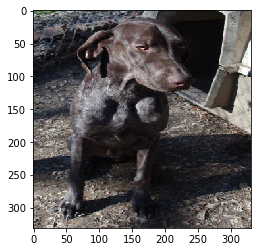

y[1]: [0.95 0.05]


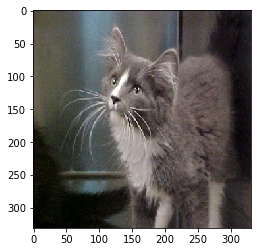

y[2]: [0.05 0.95]


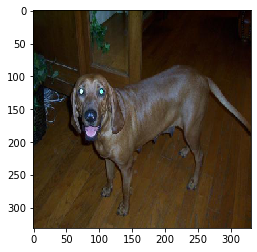

y[3]: [0.95 0.05]


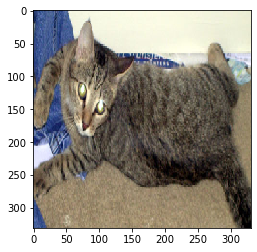

y[4]: [0.95 0.05]


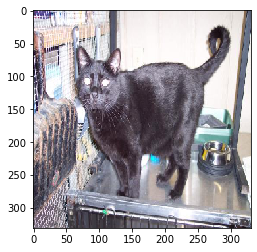

y[5]: [0.05 0.95]


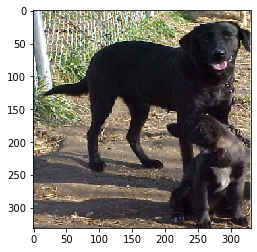

y[6]: [0.95 0.05]


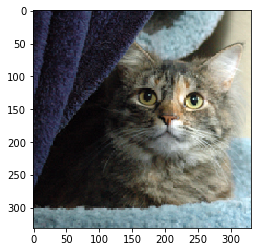

y[7]: [0.05 0.95]


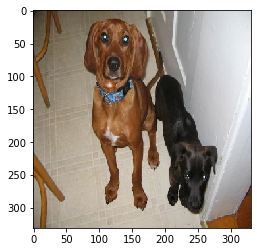

y[8]: [0.95 0.05]


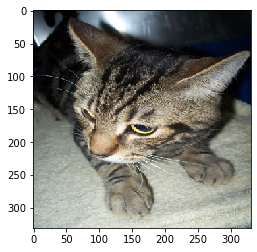

y[9]: [0.95 0.05]


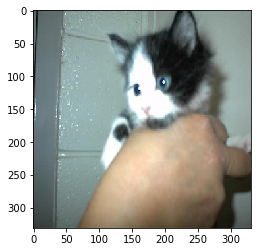

y[10]: [0.05 0.95]


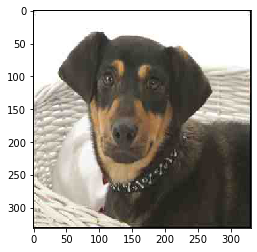

y[11]: [0.05 0.95]


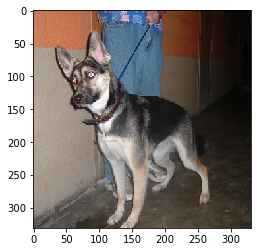

y[12]: [0.95 0.05]


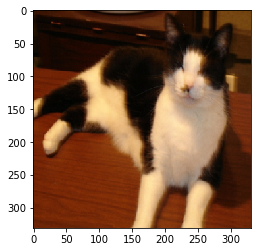

y[13]: [0.05 0.95]


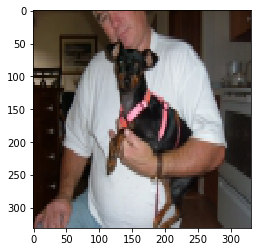

y[14]: [0.05 0.95]


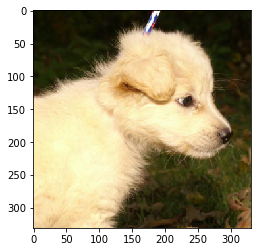

y[15]: [0.05 0.95]


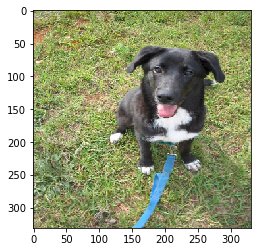

y[16]: [0.05 0.95]


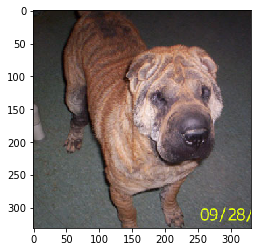

y[17]: [0.05 0.95]


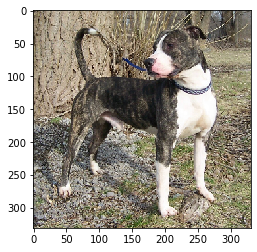

y[18]: [0.95 0.05]


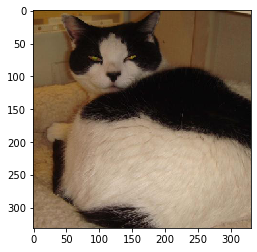

y[19]: [0.95 0.05]


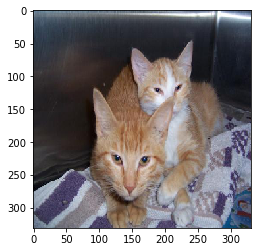

y[20]: [0.95 0.05]


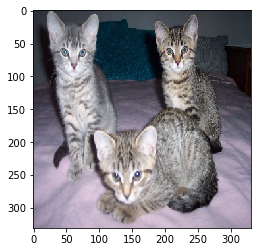

y[21]: [0.95 0.05]


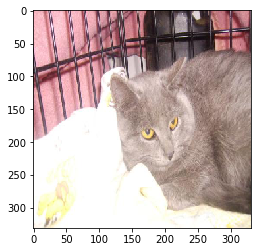

y[22]: [0.05 0.95]


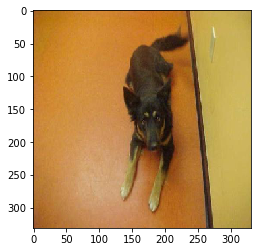

y[23]: [0.05 0.95]


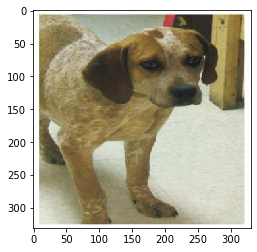

y[24]: [0.05 0.95]


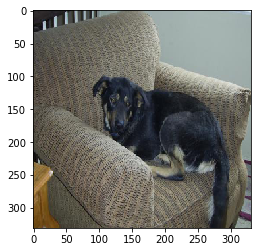

y[25]: [0.95 0.05]


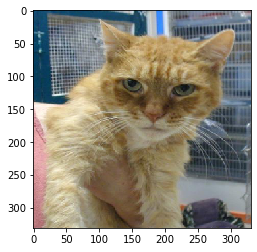

y[26]: [0.05 0.95]


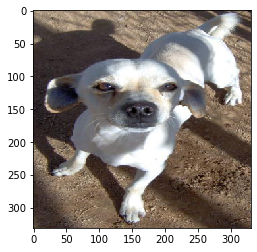

y[27]: [0.05 0.95]


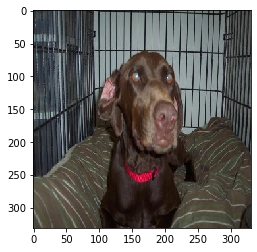

y[28]: [0.95 0.05]


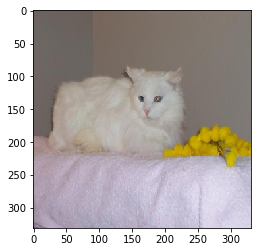

y[29]: [0.95 0.05]


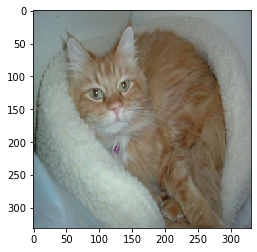

In [7]:
custom_gen = my_generator.label_smoothing_generator(gen)

my_generator.print_image_generator(custom_gen, i=0)

### grayscaleでData AugmentationするGenerator

Num_Images:  30


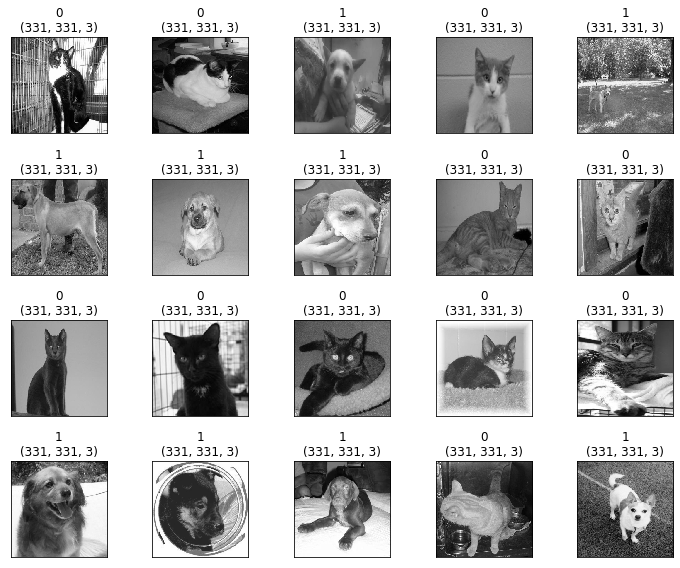

<Figure size 432x288 with 0 Axes>

In [9]:
custom_gen = my_generator.gray_generator(gen, p=1.0)

x,y = next(custom_gen)
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

### Random cropでData AugmentationするGenerator

Num_Images:  30


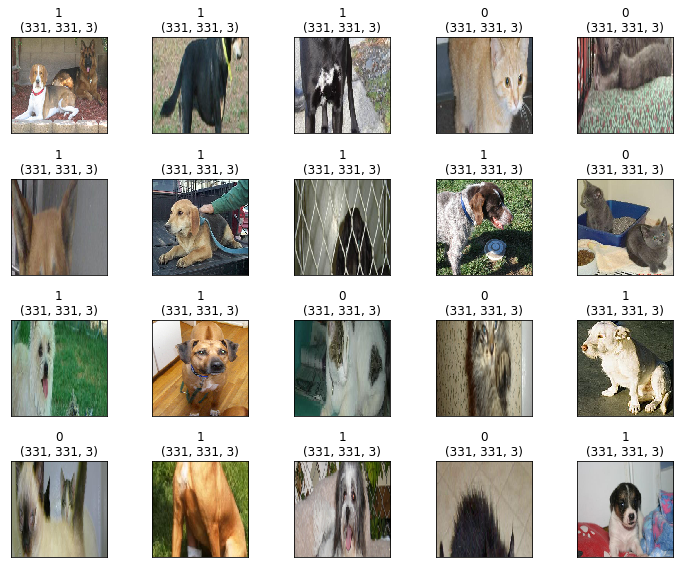

<Figure size 432x288 with 0 Axes>

In [8]:
custom_gen = my_generator.random_crop_generator(custom_gen, random_crop_size=[100,100])

x,y = next(custom_gen)
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

### Random ErasingでData AugmentationするGenerator

Num_Images:  30


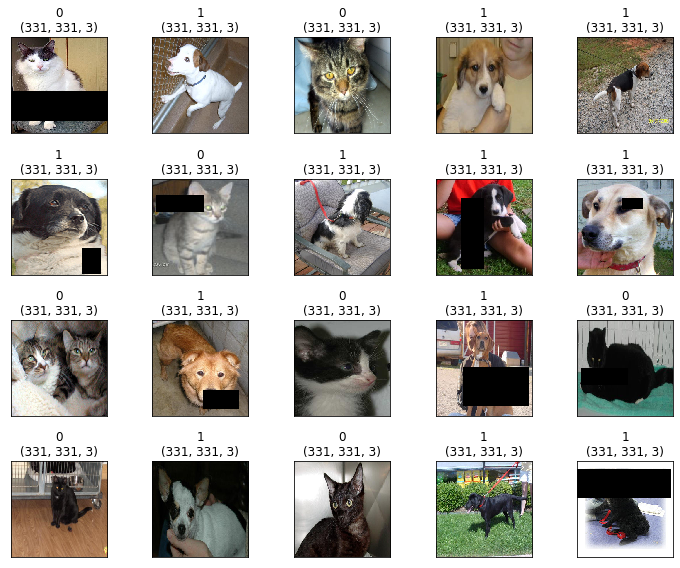

<Figure size 432x288 with 0 Axes>

In [9]:
custom_gen = my_generator.random_erasing_generator(gen, p=0.5)

x,y = next(custom_gen)
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

### RICAPでData AugmentationするGenerator

Num_Images:  30


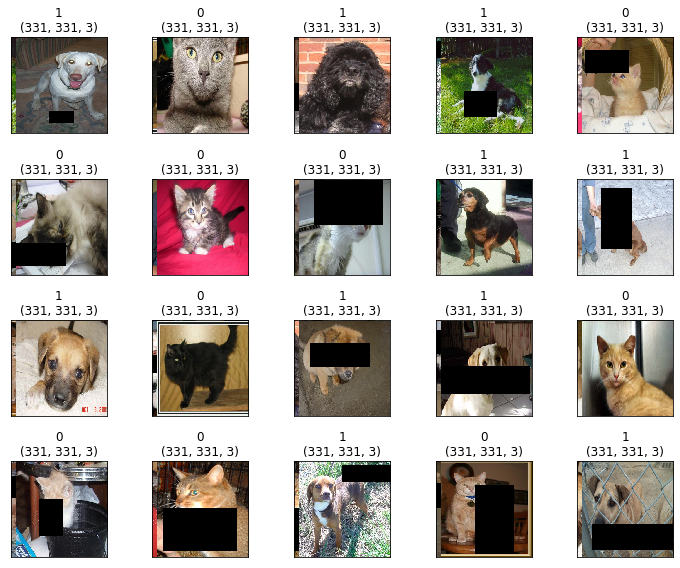

<Figure size 432x288 with 0 Axes>

In [10]:
custom_gen = my_generator.ricap_generator(custom_gen)

x,y = next(custom_gen)
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

### MixupでData AugmentationするGenerator

Num_Images:  30


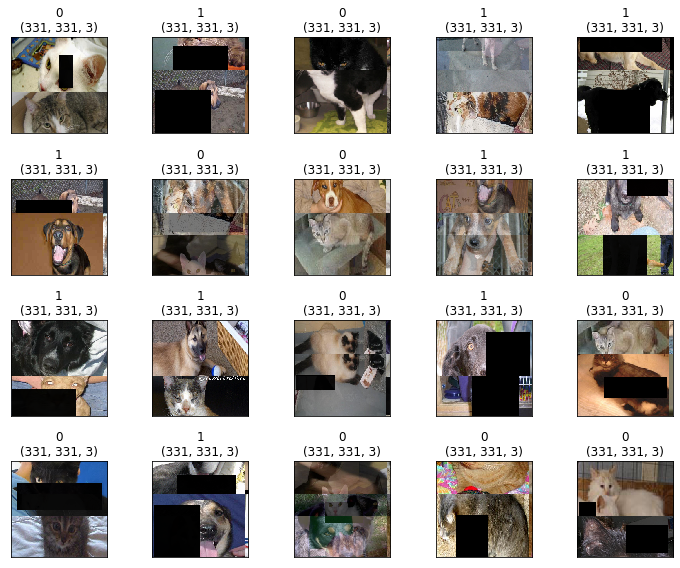

<Figure size 432x288 with 0 Axes>

In [11]:
custom_gen = my_generator.mixup_generator(custom_gen)

x,y = next(custom_gen)
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

### Rand_AugmentでData AugmentationするGenerator

1.0
[0. 1.]
Num_Images:  30


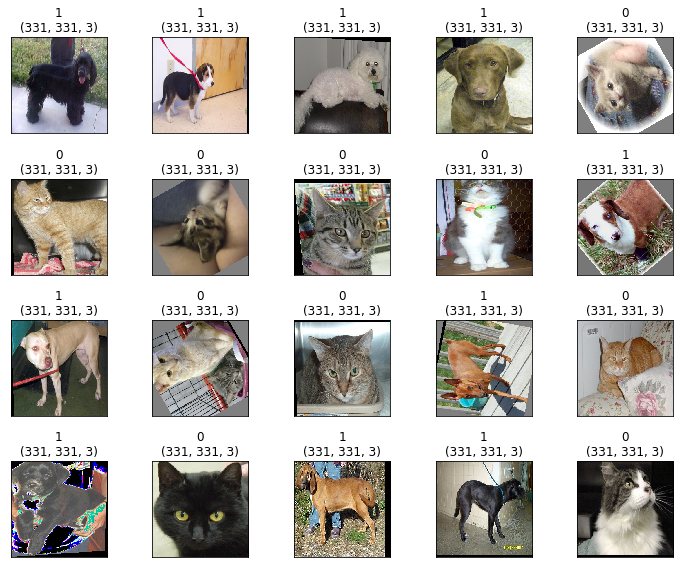

<Figure size 432x288 with 0 Axes>

In [12]:
custom_gen = my_generator.randaugment_generator(gen, N=3, M=4)

x,y = next(custom_gen)
print(np.max(x))
print(y[0])
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

### 下山さんがくずし字コンペでやっていたData AugmentationをするGenerator

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


255.0
[0. 1.]
Num_Images:  30


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


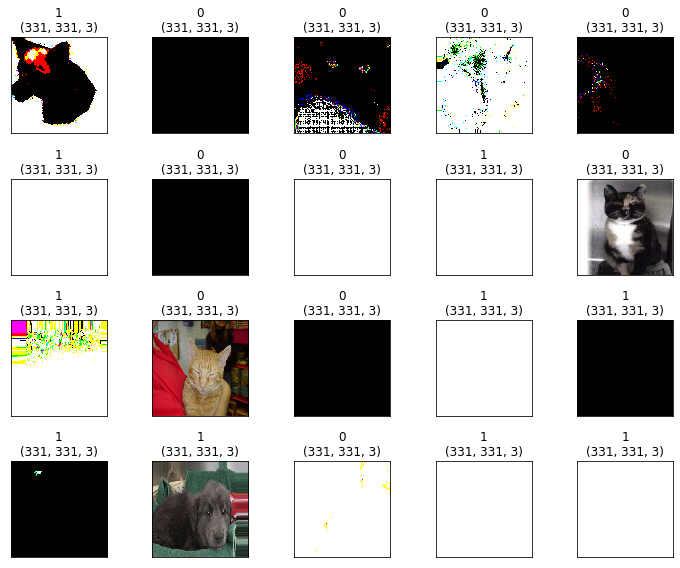

<Figure size 432x288 with 0 Axes>

In [13]:
custom_gen = my_generator.get_kuzushiji_generator(gen)

x,y = next(custom_gen)
print(np.max(x))
print(y[0])
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

### MyImageDataGeneratorクラス確認

Found 1000 images belonging to 2 classes.
1.0
[1. 0.]
Num_Images:  30


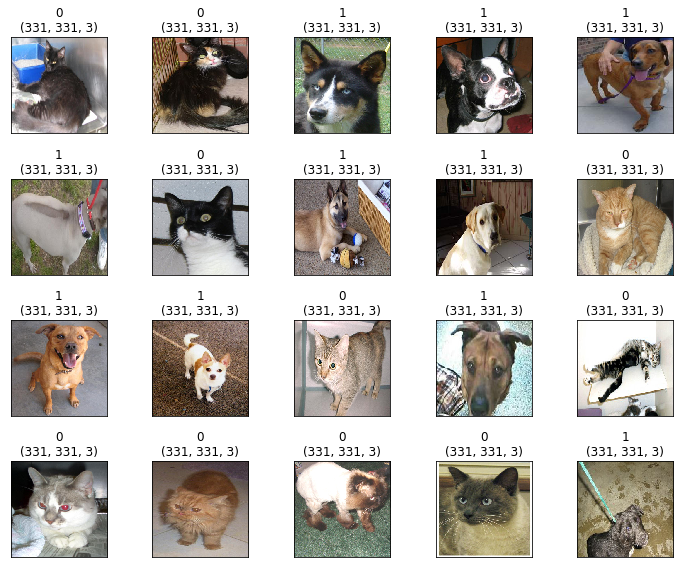

<Figure size 432x288 with 0 Axes>

In [14]:
my_IDG_options = {'rescale':1.0/255.0}
custom_gen = my_generator.MyImageDataGenerator(**my_IDG_options)

custom_gen = custom_gen.flow_from_directory(
        img_dir,
        target_size=(shape[0], shape[1]),
        color_mode='rgb',
        classes=classes,
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=True
    )

x,y = next(custom_gen)
print(np.max(x))
print(y[0])
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

Found 1000 images belonging to 2 classes.
1.0
[0.918429 0.081571]
Num_Images:  30


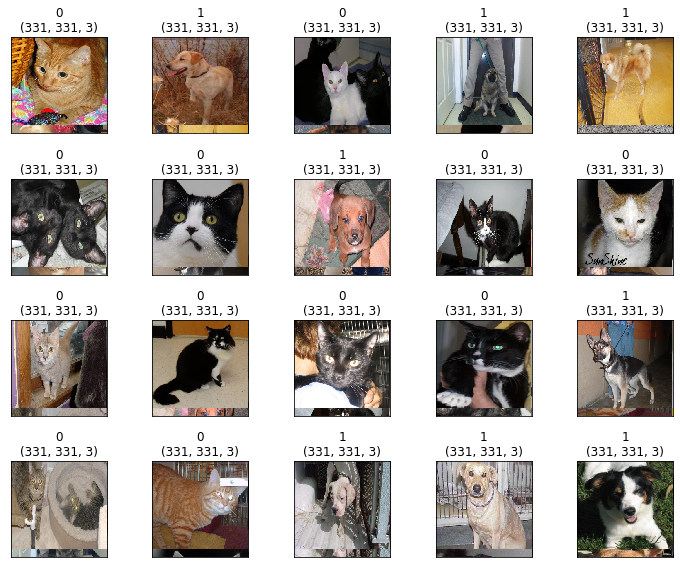

<Figure size 432x288 with 0 Axes>

In [15]:
my_IDG_options = {'rescale':1.0/255.0
                  #, 'is_kuzushiji_gen':True
                  #, 'grayscale_prob':0.5
                  #, 'random_crop':[24,112]
                  #, 'random_erasing_prob':0.5
                  #, 'mix_up_alpha':0.2
                  , 'ricap_beta':0.3
                  #, 'randaugment_N':14
                  #, 'randaugment_M':9
                 }
custom_gen = my_generator.MyImageDataGenerator(**my_IDG_options)

custom_gen = custom_gen.flow_from_directory(
        img_dir,
        target_size=(shape[0], shape[1]),
        color_mode='rgb',
        classes=classes,
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=True
    )

x,y = next(custom_gen)
print(np.max(x))
print(y[0])
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])